In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

In [22]:
boston = load_boston()
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]
x=X['LSTAT'].values

In [29]:
#1次関数
lin_1d = LinearRegression()
lin_1d.fit(x[:,None],y)
print(lin_1d.coef_)
print(lin_1d.intercept_)

[-0.77363763]
30.6433208387


In [32]:
#2次関数
degree_2=PolynomialFeatures(degree=2)
x_2=degree_2.fit_transform(x[:,None])
lin_2d = LinearRegression()
lin_2d.fit(x_2,y)
print(lin_2d.coef_)
print(lin_2d.intercept_)

[ 0.         -2.06400124  0.04503031]
37.8698496177


In [33]:
#3次関数
degree_3=PolynomialFeatures(degree=3)
x_3=degree_3.fit_transform(x[:,None])
lin_3d = LinearRegression()
lin_3d.fit(x_3,y)
print(lin_3d.coef_)
print(lin_3d.intercept_)

[  0.00000000e+00  -3.70237593e+00   1.68452866e-01  -2.59532358e-03]
43.7623822347


In [34]:
#4次関数
degree_4=PolynomialFeatures(degree=4)
x_4=degree_4.fit_transform(x[:,None])
lin_4d = LinearRegression()
lin_4d.fit(x_4,y)
print(lin_4d.coef_)
print(lin_4d.intercept_)

[  0.00000000e+00  -6.62286638e+00   5.39213841e-01  -2.05647363e-02
   2.86831559e-04]
50.9951500331


[]

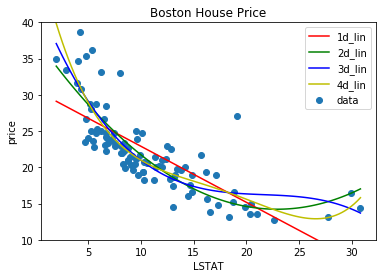

In [48]:
#結果のプロット
xt = np.linspace(np.min(x), np.max(x), num=100)

y_1d_fit=lin_1d.predict(xt[:,np.newaxis])
y_2d_fit=lin_2d.predict(degree_2.fit_transform(xt[:,np.newaxis]))
y_3d_fit=lin_3d.predict(degree_3.fit_transform(xt[:,np.newaxis]))
y_4d_fit=lin_4d.predict(degree_4.fit_transform(xt[:,np.newaxis]))

plt.scatter(x,y,label='data')
plt.plot(xt,y_1d_fit,'r',label='1d_lin')
plt.plot(xt,y_2d_fit,'g',label='2d_lin')
plt.plot(xt,y_3d_fit,'b',label='3d_lin')
plt.plot(xt,y_4d_fit,'y',label='4d_lin')

plt.ylim(10,40)
plt.title("Boston House Price")
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

In [49]:
#1次関数の2乗和誤差
mean_squared_error(y,lin_1d.predict(x[:,None]))

15.537906007479371

In [50]:
#2次関数の2乗和誤差
mean_squared_error(y,lin_2d.predict(x_2))

10.920226905348915

In [51]:
#3次関数の2乗和誤差
mean_squared_error(y,lin_3d.predict(x_3))

10.055225709746381

In [52]:
#4次関数の2乗和誤差
mean_squared_error(y,lin_4d.predict(x_4))

9.6173907154166862